<a href="https://colab.research.google.com/github/InduwaraGayashan001/OpenCV/blob/main/Image_Alignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

%matplotlib inline

In [ ]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)
URL = r"https://www.dropbox.com/s/zuwnn6rqe0f4zgh/opencv_bootcamp_assets_NB8.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB8.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

# Read Template and Scanned Image

Text(0.5, 1.0, 'Scanned Form')

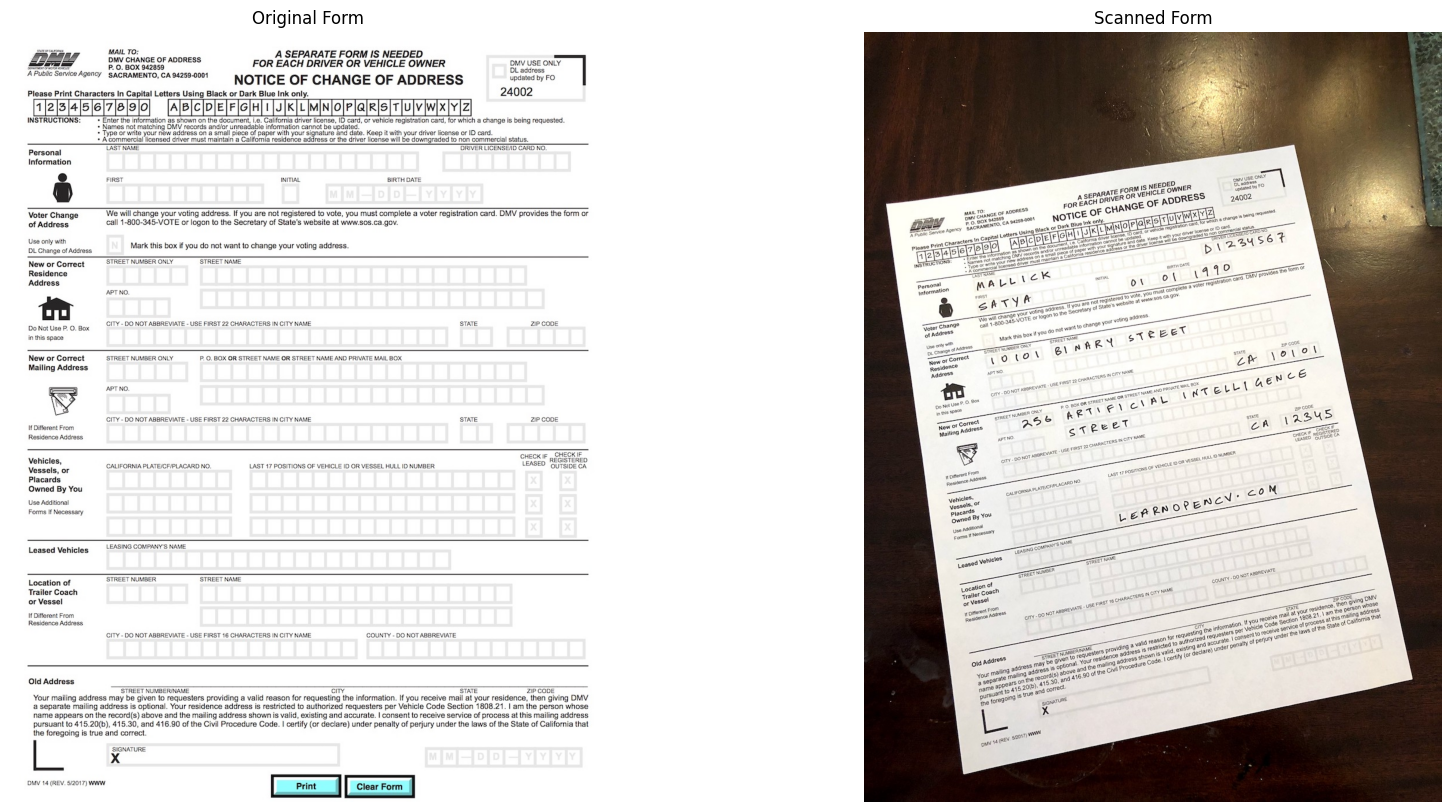

In [ ]:
# Read reference image
refFilename = "form.jpg"
im1 = cv2.imread(refFilename, cv2.IMREAD_COLOR)
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)

# Read image to be aligned
imFilename = "scanned-form.jpg"
im2 = cv2.imread(imFilename, cv2.IMREAD_COLOR)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=[20, 10]);
plt.subplot(121); plt.axis('off'); plt.imshow(im1); plt.title("Original Form")
plt.subplot(122); plt.axis('off'); plt.imshow(im2); plt.title("Scanned Form")


# Find Keypoints

Text(0.5, 1.0, 'Scanned Form')

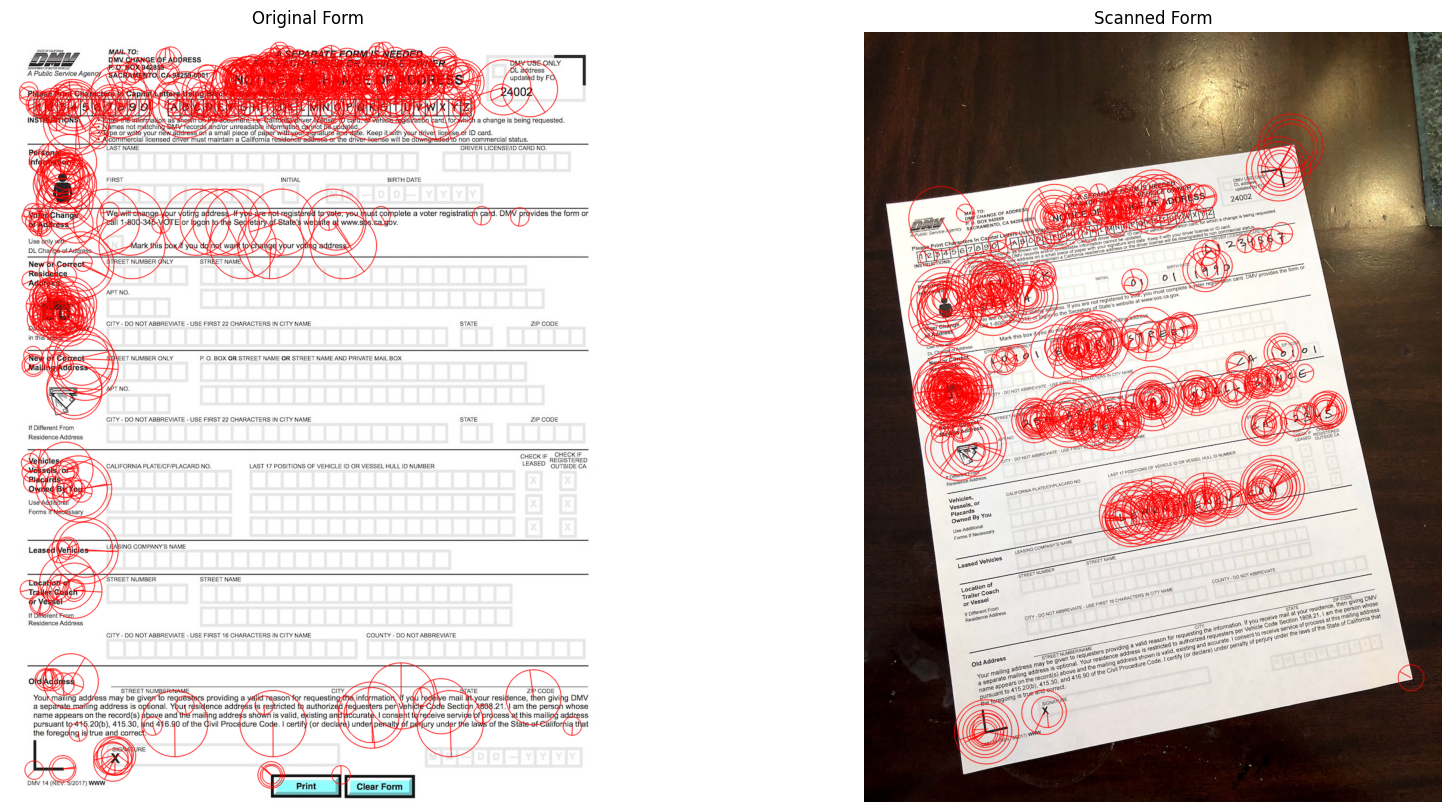

In [ ]:
im1_gray = cv2.cvtColor(im1, cv2.COLOR_RGB2GRAY)
im2_gray = cv2.cvtColor(im2, cv2.COLOR_RGB2GRAY)

MAX_NUM_FEATURES = 500
orb = cv2.ORB_create(MAX_NUM_FEATURES)
keypoints1, descriptors1 = orb.detectAndCompute(im1_gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(im2_gray, None)

im1_display = cv2.drawKeypoints(im1, keypoints1, outImage=np.array([]), color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
im2_display = cv2.drawKeypoints(im2, keypoints2, outImage=np.array([]), color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=[20, 10]);
plt.subplot(121); plt.axis('off'); plt.imshow(im1_display); plt.title("Original Form")
plt.subplot(122); plt.axis('off'); plt.imshow(im2_display); plt.title("Scanned Form")

# Match Keypoints

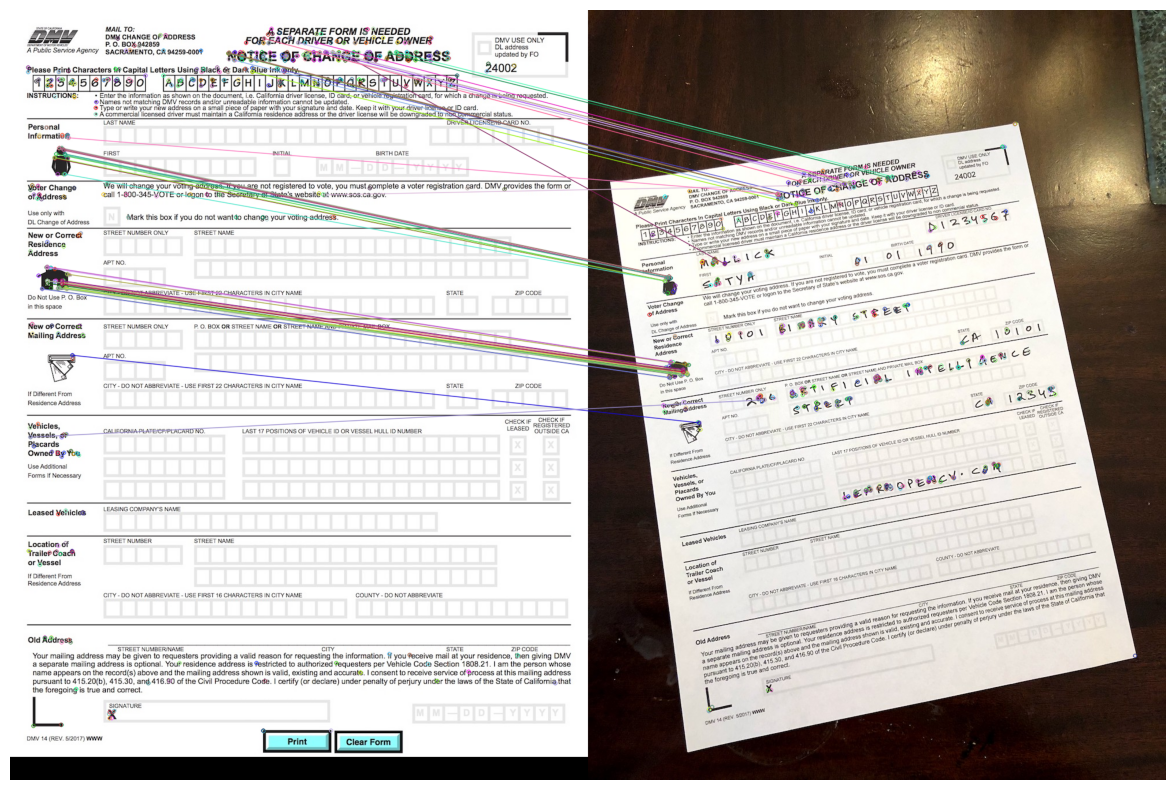

In [ ]:
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = list(matcher.match(descriptors1, descriptors2, None))

# Sort matches by score
matches.sort(key=lambda x: x.distance, reverse=False)

numGoodMatches = int(len(matches) * 0.1)
matches = matches[:numGoodMatches]

imMatches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)
plt.figure(figsize=[20, 10]); plt.axis('off'); plt.imshow(imMatches)

# Find Homography

In [ ]:
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

h , mask = cv2.findHomography(points2, points1, cv2.RANSAC)

# Wrap the Image

Text(0.5, 1.0, 'Scanned Form')

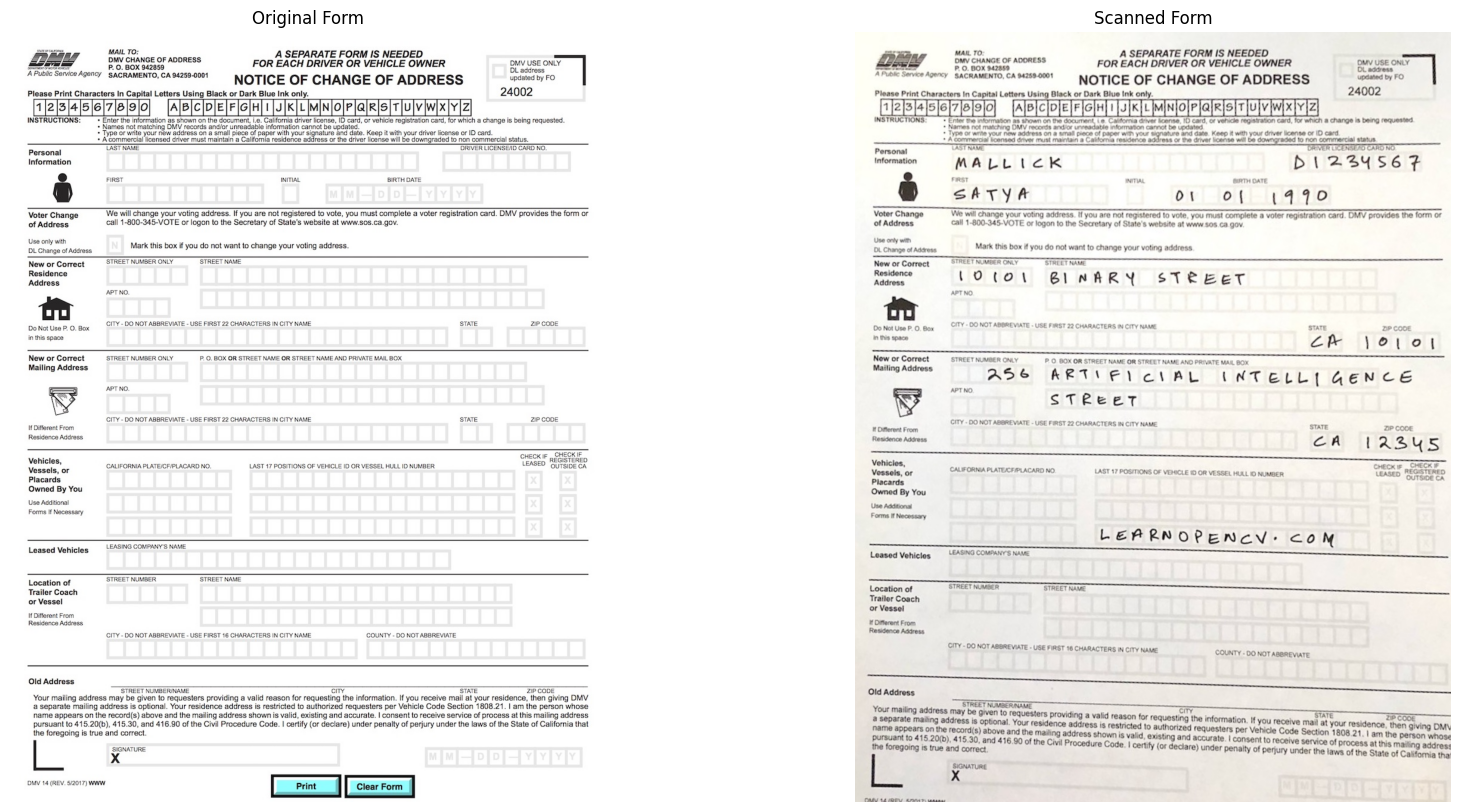

In [ ]:
height, width, channels = im1.shape
im2Reg = cv2.warpPerspective(im2, h, (width, height))

plt.figure(figsize=[20, 10]);
plt.subplot(121); plt.axis('off'); plt.imshow(im1); plt.title("Original Form")
plt.subplot(122); plt.axis('off'); plt.imshow(im2Reg); plt.title("Scanned Form")